# Session 1.2
## Scientific computing in Python
- Python has a number of scientific computing modules that enable
    - Fast computation on large data sets
    - Advanced statistical analysis
    - Data transformations
    - Computer vision
    - Plotting data and creating figures for publication in scientific journals
    
 
    
- Today we will introduce and explore the functionality of the following two libraries
    - ** numpy **: Fast computation on multidimensional arrays, with additional miscellaneous functionality---we used this to generate random numbers in Session 1-1
    - ** matplotlib **: A plotting package with an interface inspired by matlab---we saw this in Session 1-1

# Part 0: Numpy (1 hour)
- `numpy` is a package that allows creation and manipulation of multidimensional array objects called `numpy.array`
    - For example, we can create 1D vectors, 2D vectors, 2D matrices, N-dimensional arrays, etc.
- `numpy` also includes functions to enable linear algebra operations (vector/matrix multiplication, transpose, eigenvalues and eigenvectors, etc.)
- numpy is ** fast!! ** 
    - The underlying computations are performed are written in C---much faster than running pure Python
- Let's see how fast `numpy` is by taking the dot product of two vectors in two days:
    1. Manually, using plain Python
    2. Using `numpy`'s `dot()` function for array multiplication

## <font color="green">Benchmarking numpy vs pure Python </font>

In [2]:
import time           # Import time module to time the functions
import numpy as np    # It's customary to import numpy as np


N = 10000000
# Create a vector of N random numbers
rand_vector_0 = np.random.rand(N)
rand_vector_1 = np.random.rand(N)





####################################################################################################
# Method 1 (Super fast): Using the np.dot() function
####################################################################################################

t0 = time.time()
dot_product = np.dot(rand_vector_0, rand_vector_1)
t1 = time.time()
numpy_time = t1 - t0

print('Numpy np.dot() function benchmark:', t1 - t0, 'seconds')
print('result:', dot_product)
print('\n\n')



####################################################################################################
# Method 2 (Slow): Plain Python using list comprehension and sum() function
####################################################################################################

t0 = time.time()
dot_product = sum([r0*r1 for r0, r1 in zip(rand_vector_0, rand_vector_1)])
t1 = time.time()

python_time = t1 - t0

print('Plain Python (list comprehension and sum function) benchmark', t1 - t0, 'seconds')
print('result:', dot_product)
print('\n\n')


####################################################################################################
# Method 3 (Very slow): Manual dot product using for loops
####################################################################################################

t0 = time.time()
dot_product = 0
for i in range(N):
    dot_product = dot_product + rand_vector_0[i]*rand_vector_1[i]
t1 = time.time()

print('Plain Python (for loops) benchmark', t1 - t0, 'seconds')
print('result:', dot_product)
print('\n\n')

print('Numpy method is', int(python_time/numpy_time), 'times faster than using plain Python!')

Numpy np.dot() function benchmark: 0.02498006820678711 seconds
result: 2500733.03029



Plain Python (list comprehension and sum function) benchmark 4.30558443069458 seconds
result: 2500733.03029



Plain Python (for loops) benchmark 7.5013134479522705 seconds
result: 2500733.03029



Numpy method is 172 times faster than using plain Python!


### Creating numpy arrays
- Numpy arrays are all of type `numpy.ndarray`, but we simply call them arrays for short
- Sometimes we will refer to arrays as vectors or matrices; this is a mathematical description instead of a `numpy` description
    - A vector is a `numpy.ndarray` of shape $\left(N\times1\right)$ (column vector) or shape $\left(1\times N\right)$ (row vector)
    - A matrix is a `numpy.ndarray` of shape $\left(M\times N\right)$ for $M, N \neq 1$
    - One small point of confusion is that `numpy` has its own matrix class... Never use it! We will only be working with `numpy.ndarray`-type objects
    - Rules of linear algebra are imposed on vectors and matrices, for instance, multiplication only works if the dimensionality of the two vectors/matrices makes sense
- There are two methods for creating numpy arrays:

In [3]:
#########################################################
# Method 1: Converting Python lists to numpy arrays
#########################################################
column_vector = np.array([[1],[2],[3]])    # Notice the extra brackets; we will explain this in a bit
row_vector = np.array([[1,2,3]])
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])

print('a column vector')
print(column_vector, '\n\n')

print('a row vector')
print(row_vector, '\n\n')

print('a matrix')
print(matrix, '\n\n')

a column vector
[[1]
 [2]
 [3]] 


a row vector
[[1 2 3]] 


a matrix
[[1 2 3]
 [4 5 6]
 [7 8 9]] 




In [4]:
#########################################################
# Method 2: Using numpy's built-in functions
#########################################################

empty_array = np.empty((10,10))    # Create an uninitialized 10x10 matrix

zeros_array = np.zeros((10,10))    # Create a matrix of all zeroes

ones_array = np.ones((10,10))      # Create a matrix of all ones

random_array = np.random.rand(10,10)    # Create a matrix of random numbers

data_array = np.genfromtxt('./data/numpy_csv', delimiter = ',')    # Create a matrix from a csv file

print(data_array.shape)    # Figure out the shape of the matrix imported from file

OSError: ./data/numpy_csv not found.

- `shape` is a very useful property of numpy.ndarray objects
- When in doubt about the shape of an array, use `print([arrayname].shape)` to get the shape of the object
- This is incredibly useful when performing linear algebra operations to make sure you're performing the correct operation


- In addition to $\left(N\times 1\right)$ or $\left(1\times N\right)$ `numpy.ndarray`s which we call vectors, there are also truly one-dimensional `numpy.ndarray`s:

In [ ]:
row_vector = np.array([[1,2,3]])    # Row vector; technically this is a 2D object
column_vector = np.array([[1],[2],[3]])    # Column vector; also 2D
numpy_list = np.array([1,2,3])    # A truly 1D array
print('row vector shape:', row_vector.shape)
print('column vector shape:', column_vector.shape)
print('numpy list shape:', numpy_list.shape)

- We'll call true one-dimensional  ndarrays 'numpy lists' to differentiate them from vanilla 'python lists', but it's important to note that these objects are still of type `numpy.ndarray`
- Notice the extra set of brackets on row vectors and column vectors; numpy lists do not require them
- Be careful---linear algebra rules are strongly enforced for operations involving multidimensional `numpy.ndarrays` like vectors and matrices, but not necessarily enforced for operations involving single-dimensional arrays

In [ ]:
a = np.array([1,2,3])                      # 1D numpy list
b = np.array([[1],[2],[3]])                # 3x1 column vector
c = np.array([[1,2,3]])                    # 1x3 row vector



print('a:', a.shape)
print(a)
print('\n\n\n')


print('b:', b.shape)
print(b)
print('\n\n\n')


print('c:', c.shape)
print(c)
print('\n\n\n')

print('a.a')
print(np.dot(a,a), '\n')
print('a.b')
print(np.dot(a,b), '\n')
print('a.c')
print(np.dot(a,c), '\n')

### Accessing numpy arrays
- Like lists, numpy arrays are accessed with square brackets `[]`, start indexing at 0, and use `:` to extract a range of elements
- For numpy arrays, we can also specify the elements along multiple axes:
    - Numpy matrices, just like mathematical matrices, reference ** row first ** and ** column second **

In [ ]:
A = np.random.rand(5,5)    # A 5x5 matrix of random numbers


print(A,       '\n\n')    # Print the matrix
print(A[3,4],  '\n\n')    # Print the element in 4th row, 5th column
print(A[0,:],  '\n\n')    # Print the first row
print(A[:,0],  '\n\n')    # Print the first column
print(A[:2,:], '\n\n')    # Print the first two rows, all columns

### Looping over arrays
- One common operation involving numpy arrays is looping over every element in the array, similar to how we loop over Python lists

In [ ]:
# Loop over a Python list
print('looping over a python list')
python_list = [1,2,3,4,5]
for i in range(len(python_list)):
    print('i = ', i)
    pass
    
print('\n\n')
    
# Loop over two-dimensional numpy array (matrix)
print('looping over a 2D numpy.ndarray')
matrix = np.ones((3,3))
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        print('(i,j) = ', i,j)

### Array manipulation
- Below are a few of the most common types of functions used to manipulate numpy `ndarray`s (in my research, at least)
- You can find a comprehensive list of all functions at 
    - [Array manipulation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) 

##### numpy.reshape() or numpy.ndarray.reshape()
- Reshape a numpy array
- Useful for turning a numpy list into column vectors

In [ ]:
a = np.arange(9)    # A numpy list of elements 0,1,2,...,9

# Reshape a numpy.ndarray
print(a.reshape(-1,1))    # Turn the numpy list into a column vector
print(a.reshape(3,3))     # Turn the numpy list into a 3x3 matrix
print(a.reshape(4,3))     # Turn the numpy list into a 4x3 matrix... this yields an error

##### Transpose (switch rows with columns)

In [ ]:
print('Transpose of row vector')
a = np.array([[1,2,3]])    # Create a row vector
print(a)
b = a.T                    # Take the transpose to turn it into a column vector
print(b)

print('\n\n\n')

print('Transpose of numpy list')
c = np.array([1,2,3])      # Create a numpy list
print(c)
d = c.T                    # Take the transpose to ???
print(d)

- Again, using linear algebra operations with numpy lists is ill-advised

##### numpy.vstack() and numpy.hstack()
- Stack `numpy.ndarray`s vertically or horizontally
- This is useful when adding new data to a numpy array

In [ ]:
a = np.array([[1,2,3]])    # 1x3 Row vector
b = np.array([[4,5,6]])    # 1x3 Row vector

c = np.vstack((a,b))       # 2x3 Matrix

print('Stack one row on another')
print('a\n', a, '\n')
print('b\n', b, '\n')
print('c\n', c, '\n')




d = np.array([[1],[2],[3]])    # 3x1 Column vector
e = np.array([[4],[5],[6]])    # 3x1 Column vector

f = np.hstack((d,e))           # 3x2 Matrix

print('Stack two columns side-by-side')
print('d\n', d, '\n')
print('e\n', e, '\n')
print('f\n', f, '\n')


### Linear algebra operations
- [Link to numpy linear algebra functions](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
- Basic operations like matrix addition, subtraction, and multiplication by a scalar are implemented with the normal algebraic symbols
- Matrix/vector multiplication requires the `np.dot()` function
- Again, when using linear algebra in numpy always work with vectors/matrices instead of numpy lists!

In [ ]:
# Create a matrix
A = np.array([[1,0,0],[0,2,0],[0,0,3]])
print('A\n', A, '\n\n')


# Scalar multiplication
B = 2*A    
print('B=2*A\n', B, '\n\n')


# Matrix addition
C = B + A
print('C=B-A\n', C, '\n\n')


# Matrix multiplication
D = np.dot(A,B)
print('D=AxB\n', D, '\n\n')

# Inverse
E = np.linalg.inv(D)
print('E=D^{-1}\n', E, '\n\n')

### Miscellaneous operations and functions

##### np.where(): Find all elements fitting some criteria
- This function is super useful---there are many cases where you need to grab the elements of an array that satisfy some criteria

In [ ]:
# Grab all elements from the list exceeding some value
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

# Get the indices of the elements that satisfy the criteria
print(np.where(A>5))

# Get the actual elements from the array
print(A[np.where(A>5)])


##### `np.mean()` and `np.std()`: Calculate mean and standard deviations of numpy array

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print('A = ', A)
print('Mean of A (all elements) = ', A.mean())           # Calculate mean of entire matrix
print('Mean of As columns', A.mean(axis = 0))   # Calculate means of A's columns
print('Standard deviation of As rows', A.std(axis = 1))    # Calculate standard deviations of A's rows

##### `np.max()` and `np.min()`: Calculate max and min of numpy array

In [ ]:
print('A minimum:', np.min(A))

##### `np.abs()`: Calculate the absolute value of numpy array

In [ ]:
random_matrix = np.random.rand(3,3)-0.5

print('before')
print(random_matrix)

print('after')
print(np.abs(random_matrix))

## <font color="red">Exercise: Numpy practice (15 minutes)</font>
1. Load the dataset located in the file './data/numpy_practice'; make sure you specify the correct delimiter!
    - Hint: Use the `np.genfromtxt()` function to load the data set
2. Determine the shape of the matrix
    - Answer: (1000, 3)
3. Remove the first 100 rows of the matrix and recalculate its shape
    - Answer: (900, 3)
4. Calculate the average and standard deviation of each column
    - Answer:
        - means [ 0.07023286  4.96865587 -2.00031407]
        - std devs [ 0.97754576  2.9510636   0.50815699]
5. Remove all rows for which the first element is 3 or more times greater than that column's standard deviation, and recalculate its shape
    - Answer: (898,3)
7. Append a column of ones to the beginning of the matrix, and recalculate its shape
    - Answer: (898,4)

In [ ]:
##########################
# Insert solution below! #
##########################



# 1. Load the data set
############################################################################################

A = np.genfromtxt('./data/numpy_practice', delimiter = ' ')





# 2. Determine array's shape
############################################################################################

print('Initial size')
print(A.shape)
print('\n')





# 3. Remove first 100 rows and recalculate shape
############################################################################################

A = A[100:,:]
print('Removed first 100 rows')
print(A.shape)
print('\n')




# 4. Calculate mean and std dev of columns
############################################################################################

means = np.mean(A, axis = 0)
std_devs = np.std(A, axis = 0)
print('means', means)
print('std devs', std_devs)
print('\n')



# 5. Remove rows where 1st column value is greater/less than 3 standard deviations from mean
############################################################################################


mean = means[0]
std_dev = std_devs[0]


keep_rows = np.where(np.abs(A[:,0]-mean) <= 3*std_dev)[0]
A = A[keep_rows,:]
print('Removed 3 sigma outliers')
print(A.shape)
print('\n')


# 6. Append column of ones
############################################################################################


ones_column = np.ones((A.shape[0],1))
A = np.hstack((ones_column, A))
print('Appended column of ones')
print(A.shape)
print('\n')

# Part 1. Matplotlib (30 minutes)
- Matplotlib is a 2D python plotting library that you can use to make publication-quality figures
- We almost exclusively use the `matplotlib.pyplot` module within matplotlib

In [ ]:
import matplotlib.pyplot as plt    # The main plotting module; it's customary to import it as `plt`
%matplotlib inline                 # This is a Jupyter 'magic' command that tells the image to render in the notebook

- There are four plotting functions we'll focus on today
    - `plt.plot()`: plot lists with elements connected by lines
    - `plt.scatter()`: similar to plot(), but scatter markers only
    - `plt.hist()`: create a histogram
    - `plt.imshow()`: plot matrices or images
- After going over the four plotting functions, we'll introduce some cosmetic options so we can make our plots look nice

## Line plots: `plt.plot()`
    - The interface for plt.plot() is simple, and depends on whether we supply as arguments 1 or 2 lists
        - 1 list: Plots the list on the y-axis, with the x-axis taking on numbers [0,1,2,...N-1], where N is the number of data points
        - 2 lists: Interprets the data as (x,y) pairs
    - Arguments can be python lists, numpy lists, or numpy vectors/matrices
    - If given a numpy matrix, each column is interpreted as a separate data set!
    - Probably best to always provide Python or numpy lists as arguments

In [ ]:
# Single list
sines = np.sin(np.linspace(0,2*np.pi,100).reshape(-1,1))    # Create numpy list of sines of 100 numbers from 0 to pi
plt.plot(sines)
plt.show()

# Two lists
angles = np.linspace(0, 2*np.pi,100).reshape(-1,1)
plt.plot(angles, sines)
plt.show()

# Plot two curves on the same graph
cosines = np.cos(angles)
plt.plot(angles, sines)
plt.plot(angles, cosines)
plt.show()

- Notice the `plt.show()` line at the end of each set of plotting functions

## Scatter plots: plt.scatter()
- Similar to plt.plot(), but plots markers, not lines
- Requires two lists or two column vectors (one for x data, one for y data)
- Optional cosmetic options are slightly different than those used in `plt.plot()`

In [ ]:
# Generate a correlated bivariate Gaussian distribution with random mean and random correlation matrix
mean = np.array([.5, -.5])
covariance = np.array([[.05,.05],[.25,1.5]])
N = 1000
data = np.random.multivariate_normal(mean = mean, cov = covariance, size = N)

# Plot the data;
# The data is an NX2 matrix, with the first column corresponding to x-dimension, second column y
plt.scatter(data[:,0], data[:,1], zorder = 100)

plt.grid()

plt.show()

# Histograms: plt.hist()
- Bins 1D data and plots a histogram
- Optional argument bins is used to specify the number of bins

In [ ]:
# Plot histograms of x, y from the multivariate Gaussian drawn above
plt.hist(data[:,0], alpha = 0.5, bins = 20)
plt.hist(data[:,1], alpha = 0.5, bins = 20)
plt.show()

# Matrices and images: plt.imshow()

- Plots matrices either in grayscale (2D ndarray) or RGB(3D ndarray)
- Pixel images (bitmaps) can be interpreted as a matrix and plotted

In [ ]:
# Plot a data matrix
white_noise = np.random.randint(0, 255, size = (288, 512))    # Generate white noise
plt.imshow(white_noise, cmap = 'gray')
plt.show()

# Plot an image
import scipy.misc    # Import this to convert image to matrix
direct_stem_matrix = scipy.misc.imread('./images/directstem.jpg')    # Convert image to matrix
plt.imshow(direct_stem_matrix)
plt.show()

## Customization
- matplotlib has a ton of customization options so you can make really nice looking plots
- All of the plots created so far have been pretty simple; in reality, we want to label axes, give the plot a title, maybe include legends, customize line colors and thicknesses, etc.
- In the below cell, we go over some of the most important customization options in matplotlib
- You don't have to memorize this stuff, but the below cell should serve as a useful reference to go back to if you want to spruce up a plot

In [ ]:
# Create figure
fig = plt.figure(figsize = (8,6))    # Set the figure size to be 8 inches wide, 6 inches tall
    
# Plot data
plt.plot(angles, sines + np.random.normal(0,.3,size = sines.shape[0]).reshape(-1,1),\
         lw = 3, ls = '-', color = 'red', label = 'data', zorder = 1)
plt.plot(angles, sines, lw = 5, ls = '--', color = 'blue', label = 'fit', zorder = 2)
plt.xlim(0,2*np.pi)
plt.ylim(-2,2)

# Plot cosmetics
plt.title('Voltage vs phase', size = 16, fontweight = 'bold')
plt.xlabel('Phase $\phi$ (rad)', size = 14, fontweight = 'bold')
plt.ylabel('Voltage (V)', size = 14, fontweight = 'bold')

plt.grid()
plt.legend(loc = 'upper right', fontsize = 14)
plt.tick_params(labelsize = 14)
plt.xticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.yticks([-1,0,1])

plt.savefig('./images/fancy_figure.png', dpi = 100)
plt.show()

##### Explanation:

- `plt.figure()`
    - Allows you to specify options for the greater figure, such as its total size, number of subplots, etc.
    - Common use-case is `plt.figure(figsize = ([width], [height]))` to make the image the size you want

- `plt.plot()` cosmetic optional arguments:
    - lw = (any int); width of line
    - ls = ('-', '--', ':'); line style, solid, dashed, or dotted
    - color = (string like 'blue' or RGB list with elements in range 0-1 e.g. [0, 0.5, 0.5])
    - label = (string); label is used when making legend
    - zorder = (any int); the 'height' of the lines; higher zorder lines will plot over lower zorder lines
- `plt.xlim()`: (any float), (any float); set the xlimits between the first value provided and second value provided

- `plt.title()`: (any string); set the title of the plot
    - Cosmetic arguments
        - size = (any int); set hte font size
        - fontweight = 'bold'; make font bold
- `plt.xlabel()`: Set the plot's x-axis label
    - Cosmetic arguments same as `plt.title()`
- `plt.legend()`: Create a legend 
    - Cosmetic arguments
        - loc = 'upper left, bottom right', etc.; Set the location of the legend
        - fontsize = (any int); set the font size of the text in the legend
- `plt.grid()`: Add a grid overlay to the plot
- `plt.xticks()`: (list of float or int); manually set the locations of the ticks on the x-axis
    - Cosmetic argument
        - labels = (list of string); customize the xlabels, e.g. use the symbol for pi instead of 3.14
- `plt.tick_params()`: Change the parameters of the ticks and axis tick labels

## <font color="red">Exercise: Matplotlib practice (15 minutes)</font>
- Load the data contained in `./data/matplotlib_practice`
- Plot each of the columns against the first column on the same plot
- Add features onto the plot such as axis titles and a legend to make it more presentable

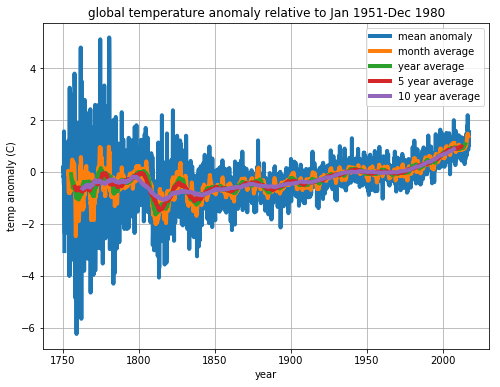

In [44]:
#########################
# Insert solution here! #
#########################
import matplotlib.pyplot as plt

file_path = '../data/matplotlib_practice'

columns = ['time', 'mean anomaly', 'month average', 'year average', '5 year average', '10 year average', '20 year average']

data = np.genfromtxt(file_path, skip_header = 1, delimiter = '\t')

fig = plt.figure(figsize = (8,6))



plt.plot(data[:,0], data[:,1], label = columns[1], lw = 4)
plt.plot(data[:,0], data[:,2], label = columns[2], lw = 4)
plt.plot(data[:,0], data[:,3], label = columns[3], lw = 4)
plt.plot(data[:,0], data[:,4], label = columns[4], lw = 4)
plt.plot(data[:,0], data[:,5], label = columns[5], lw = 4)


plt.title('global temperature anomaly relative to Jan 1951-Dec 1980')
plt.xlabel('year')
plt.ylabel('temp anomaly (C)')


plt.legend(loc = 'best')

plt.grid()

plt.show()